Misclassified samples: 0


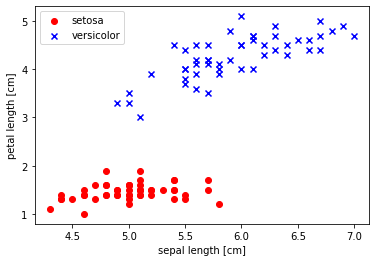

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from perceptron import Perceptron

iris = load_iris()
X = iris.data[0:100, (0, 2)] # sepal length, petal length
y = iris.target[0:100] # Setosa or Versicolor
# plot data
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
#將小標籤放在左上方
plt.legend(loc='upper left')
per_clf = Perceptron(random_state=42)
#default learning rate = 1.0
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=1)
per_clf.fit(X_train,y_train)
y_pred = per_clf.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

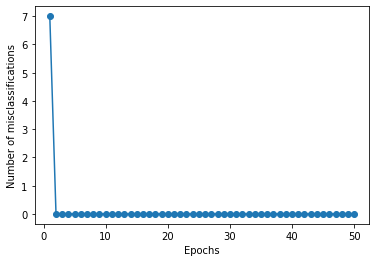

In [6]:
plt.plot(range(1, len(per_clf.errors_) + 1), per_clf.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# 繪出決策邊界

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 設定 marker generator and color map
    markers = ('s', 'x')
    colors = ('red', 'blue')
    # 去除數组 y中的重複數字，並進行排序之後输出
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 畫 decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 畫 class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1],
                    alpha = 0.8, 
                    c = colors[idx],
                    marker = markers[idx], 
                    label = cl, 
                    edgecolor = 'black')


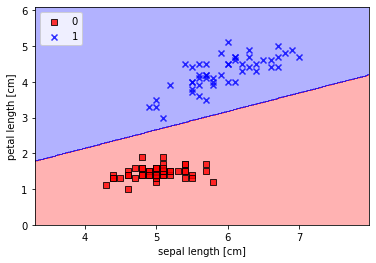

In [8]:
plot_decision_regions(X, y, classifier=per_clf)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')